# Writing your own Neural Network code

In [1]:
# import
import autograd.numpy as np 

# custom imports
from neural_network import create_layers, create_layers_batch, backpropagation, backpropagation_batch, feed_forward, feed_forward_batch
from cost_functions import mse, mse_derivative
from activation_functions import sigmoid, sigmoid_derivative, RELU, RELU_derivative, linear, linear_derivative
from runge_preprocessing import x_noise, y_noise, x, y, x_train_scaled, x_test_scaled, y_train, RUNGE_HIDDEN_LAYERS, RUNGE_MAX_ITERATIONS

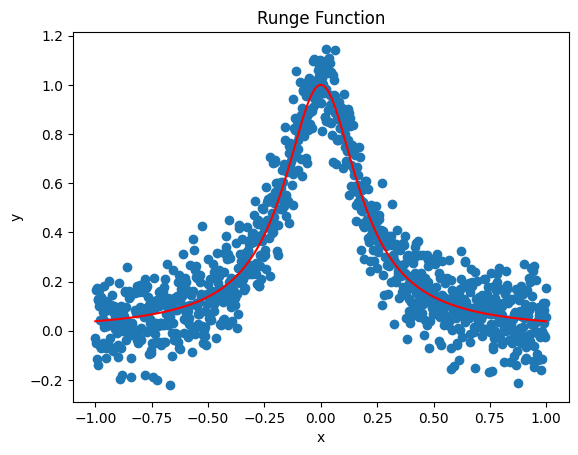

In [2]:
# Plotting, might be removed later

import matplotlib.pyplot as plt
plt.scatter(x_noise, y_noise)
plt.plot(x, y, color='red')
plt.title("Runge Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()




In [ ]:
# Parameters for task b

# ---> see lecture notes week 43 about activation function, useful for choosing activation functions
activation_functions = [sigmoid, sigmoid, linear]
activation_functions_derivatives = [sigmoid_derivative, sigmoid_derivative, linear_derivative]  
network_input_size = 1   # ----> should be the same as number of features, i.e. 1
layer_output_sizes = [RUNGE_HIDDEN_LAYERS[0], RUNGE_HIDDEN_LAYERS[1], 1]   # ---> should be hidden layers and output layer size

# reshape to column vector as input to batch version of backpropagation
x_train_scaled = np.array(x_train_scaled).reshape(-1,1) 
y_train = np.array(y_train).reshape(-1, 1)
#y_train_scaled = np.array(y_train_scaled).reshape(-1,1)     ----> not use scaled y?

layers = create_layers_batch(network_input_size, layer_output_sizes)
#for i in layers:
#    print(i[0].shape)

# Just a sanity check to see in feed forward works   --- remove it later
#predictions = feed_forward_batch(x_train_scaled, layers, activation_functions)
#for i in predictions:
#    print(i[0].shape, i[1].shape)
#print(predictions)

gradients = backpropagation_batch(x_train_scaled, layers, activation_functions, y_train, activation_functions_derivatives, cost_der=mse_derivative)
#gradients = backpropagation_batch(x_train_scaled, layers, activation_functions, y_train_scaled, activation_functions_derivatives, cost_der=mse_derivative) --> scaled y
# Just a sanity check to see in feed forward works   --- remove it later
#for i in gradients:
#    print(i[0].shape, i[1].shape)
#print(gradients)



# ----> Question in project description: 
#   ----> Initialize weigths using normal distribution. How would you initialize biases?
#   ----> Which activation function for output layer?
#  -----> how to set up design/feature matrix. Hint: does it have to represent a polynomial approximation as you did in project 1?
#  --- see project description for more questions

50 100
